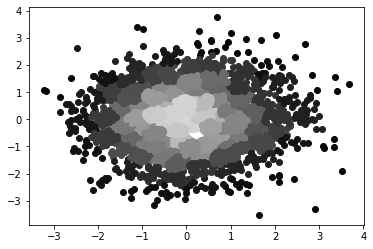

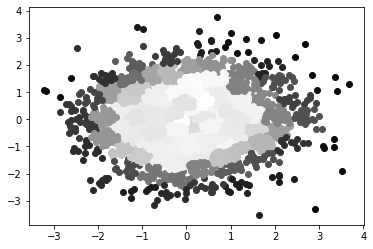

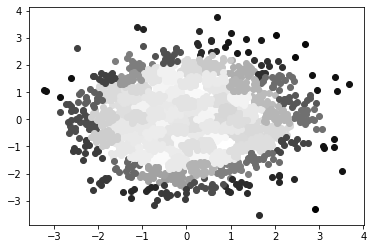

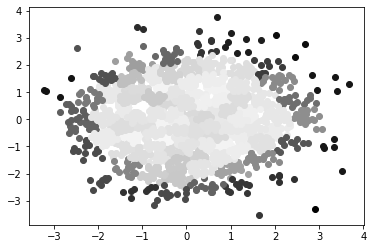

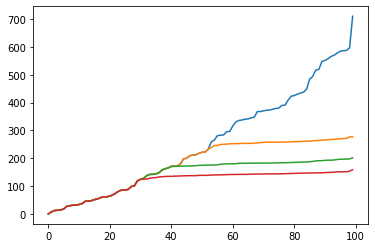

In [125]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_cluster_density(cluster):
    if len(cluster) == 1: 
        return 0
    centroid = cluster.mean(axis=0)
    cluster = cluster - centroid
    mean_norm = np.linalg.norm(cluster, axis=1).mean()
    rho = len(cluster) / mean_norm
    return rho

def get_cluster_densities(clusters):
    cluster_densities = []
    for cluster in clusters:
        cluster_densities.append(get_cluster_density(cluster))
        
    return cluster_densities

def plot_clusters(clusters):
    cluster_densities = []
    for cluster in clusters:
        cluster_densities.append(cluster_density(cluster))
        
    max_rho = max(cluster_densities)
    mean_rho = np.mean(cluster_densities)
    fig, ax = plt.subplots()
    for cluster, rho in zip(clusters, cluster_densities):
        ax.scatter(cluster[:,0], cluster[:, 1], c=str(rho / max_rho))

        
def weed_out_data(clusters):
    cluster_densities = get_cluster_densities(clusters)
    max_rho = max(cluster_densities)
    mean_rho = np.mean(cluster_densities)
    
    new_clusters = []
    for cluster, rho in zip(clusters, cluster_densities):
        new_cluster = cluster
        if rho == 0:
            pass
        elif mean_rho / rho < 1:
            ratio = mean_rho / rho
            remove = int((1 - ratio) * len(cluster))
            np.random.shuffle(cluster)
            new_cluster = cluster[remove:]
            
        new_clusters.append(new_cluster)
    
    return new_clusters

        
dp = np.random.multivariate_normal([0,0], np.eye(2), 4000)
n_clusters = 100
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dp)

clusters = []
for i in range(n_clusters):
    cluster = dp[kmeans.labels_ == i]
    clusters.append(cluster)
    
    
d = []

for i in range(4):
    densities=get_cluster_densities(clusters)
    densities.sort()
    d.append(densities)
    
    plot_clusters(clusters)
    clusters = weed_out_data(clusters)
    
    
fig,ax=plt.subplots()
for i in d:
    ax.plot(range(len(i)), i)


In [126]:
print(dp.shape)

(4000, 2)


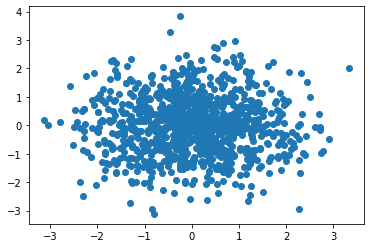

In [149]:
from sklearn.decomposition import PCA

X = np.random.multivariate_normal(np.ones(5), np.eye(5), 1000)

pca = PCA(n_components=2)
pca.fit(X)
x = pca.transform(X)

y, z = zip(*x)
plt.scatter(y, z)

(1.3731268937581294,
 -1.0458042580556315,
 2.500620649337342,
 0.4542152142642928,
 -1.6854253716759264,
 0.5990912848659025,
 -2.0306818140049065,
 -0.8936498075112124,
 0.4516153120975903,
 0.2768918969244197)